In [125]:
import env
import pandas as pd
import utilities as utils
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle_zillow import wrangle_zillow_df
from scipy import stats
from datetime import date

## 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

## 2. Answer those questions through a mix of statistical tests and visualizations.

In [126]:
train, validate,test = utils.split_dataframe_continuous_target(wrangle_zillow_df(), target='logerror')
zillow_df = train
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24516 entries, 48811 to 59353
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            24516 non-null  int64  
 1   parcelid                      24516 non-null  int64  
 2   logerror                      24516 non-null  float64
 3   transactiondate               24516 non-null  object 
 4   parcelid.1                    24516 non-null  int64  
 5   latest_transaction            24516 non-null  object 
 6   id.1                          24516 non-null  int64  
 7   parcelid.2                    24516 non-null  int64  
 8   bathroomcnt                   24516 non-null  float64
 9   bedroomcnt                    24516 non-null  float64
 10  buildingqualitytypeid         24516 non-null  float64
 11  calculatedbathnbr             24516 non-null  float64
 12  calculatedfinishedsquarefeet  24516 non-null  float64
 1

In [127]:
alpha = .05

1. Is logerror significantly lower for 2-4 bedroom properties than the population?
    * Does logerror correlate with number of bedrooms?

In [128]:
null_hyp = "Logerror is not lower for 2-4 bedroom properties than the mean of the population"
alt_hyp = "Logerror is lower for 2-4 bedroom properties than the mean of the population"

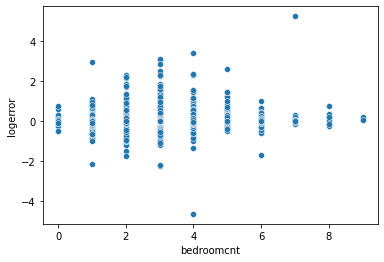

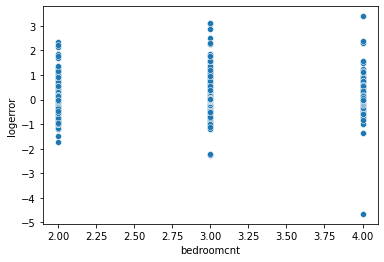

In [129]:
beds_2_to_4 = zillow_df[(zillow_df.bedroomcnt >= 2) & (zillow_df.bedroomcnt <= 4)]

sns.scatterplot(x='bedroomcnt', y='logerror', data=zillow_df)
plt.show()
sns.scatterplot(x='bedroomcnt', y='logerror', data=beds_2_to_4)
plt.show()

In [130]:
t, p = stats.ttest_1samp(beds_2_to_4.logerror, zillow_df.logerror.mean())
utils.evaluate_hypothesis_ttest(p, t, alpha, "less", null_hyp, alt_hyp)

stats.mannwhitneyu(x=beds_2_to_4.logerror, y=zillow_df.logerror, alternative="less")

------------------------------------------
t:  -1.8454183139443643, p:  0.06499013349230716, a:  0.05

We reject the null hypothesis. We move forward with the alternative hypothesis:  Logerror is lower for 2-4 bedroom properties than the mean of the population
------------------------------------------


MannwhitneyuResult(statistic=267024447.0, pvalue=0.026511117996409476)

Logerror is lower for 2-4 bedroom properties by ttest and significant with Mann-Whitney test. Zillow able to more accurately predict these properties?

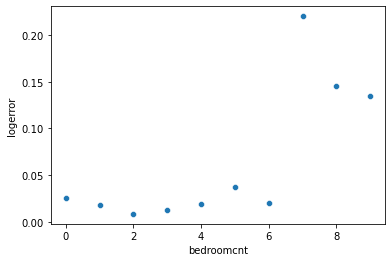

------------------------------------------
corr:  0.03926477173533256, p:  7.749594224559705e-10, a:  0.05

We reject the null hypothesis. We move forward with the alternative hypothesis:  There is a correlation between bedrooms and logerror
Correlation direction:  positive
------------------------------------------


{'corr': 0.03926477173533256,
 'p': 7.749594224559705e-10,
 'a': 0.05,
 'reject_null': True,
 'message': 'We reject the null hypothesis. We move forward with the alternative hypothesis:  There is a correlation between bedrooms and logerror',
 'correlation': 'positive'}

In [131]:
null_hyp = "There is no correlation between bedrooms and logerror"
alt_hyp = "There is a correlation between bedrooms and logerror"

sns.scatterplot(x=zillow_df.groupby('bedroomcnt').logerror.mean().index, y=zillow_df.groupby('bedroomcnt').logerror.mean())
plt.show()

r, p = stats.pearsonr(zillow_df.bedroomcnt, zillow_df.logerror)
utils.evaluate_hypothesis_pcorrelation(r, p, alpha, null_hyp, alt_hyp)

The correlation value is too small to be considered practically a positive correlation despite being found to be statistically significant. This seems to be backed up by the visualization.

2. Is logerror significantly lower for 600-2200 sqft properties than the population?
    * Does logerror correlate with total square feet?

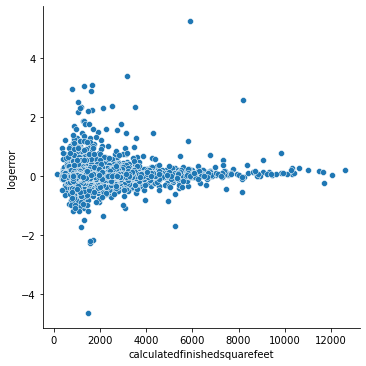

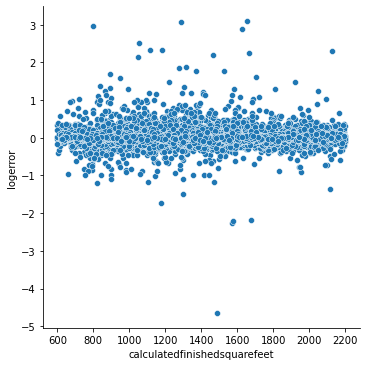

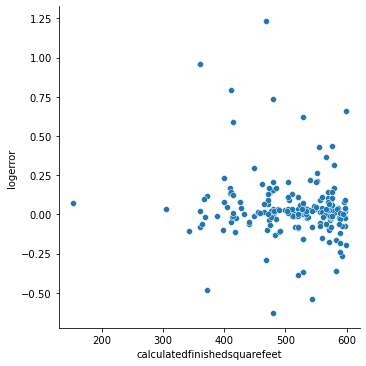

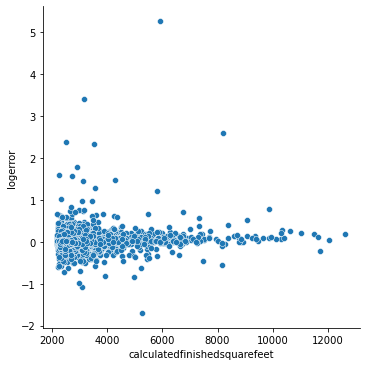

In [132]:
null_hyp = "Logerror for 600-2200 sqft properties is not lower than the population"
alt_hyp = "Logerror for 600-2200 sqft properties is lower than the population"

sqft_600_2200 = zillow_df[(zillow_df.calculatedfinishedsquarefeet >= 600) & (zillow_df.calculatedfinishedsquarefeet <=2200)]
sqft_less600 = zillow_df[(zillow_df.calculatedfinishedsquarefeet < 600)]
sqft_over2200 = zillow_df[(zillow_df.calculatedfinishedsquarefeet > 2200)]

sns.relplot(x='calculatedfinishedsquarefeet', y='logerror', data=zillow_df)
plt.show()
sns.relplot(x='calculatedfinishedsquarefeet', y='logerror', data=sqft_600_2200)
plt.show()
sns.relplot(x='calculatedfinishedsquarefeet', y='logerror', data=sqft_less600)
plt.show()
sns.relplot(x='calculatedfinishedsquarefeet', y='logerror', data=sqft_over2200)
plt.show()

In [133]:
t, p = stats.ttest_1samp(sqft_600_2200.logerror, zillow_df.logerror.mean())
utils.evaluate_hypothesis_ttest(p, t, alpha, "less", null_hyp, alt_hyp)

stats.mannwhitneyu(sqft_600_2200.logerror, zillow_df.logerror, alternative="less")

------------------------------------------
t:  -2.373013598053931, p:  0.017653107090376916, a:  0.05

We reject the null hypothesis. We move forward with the alternative hypothesis:  Logerror for 600-2200 sqft properties is lower than the population
------------------------------------------


MannwhitneyuResult(statistic=237733662.0, pvalue=0.00010507645411284978)

600-220 sqft properties have lower logerror. Zillow seems to more accurately predict these properties.

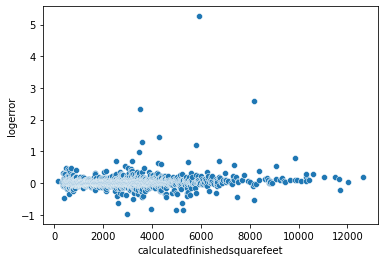

------------------------------------------
corr:  0.04342638811183612, p:  1.0290027617711705e-11, a:  0.05

We reject the null hypothesis. We move forward with the alternative hypothesis:  There is a correlation between sqft and logerror
Correlation direction:  positive
------------------------------------------


{'corr': 0.04342638811183612,
 'p': 1.0290027617711705e-11,
 'a': 0.05,
 'reject_null': True,
 'message': 'We reject the null hypothesis. We move forward with the alternative hypothesis:  There is a correlation between sqft and logerror',
 'correlation': 'positive'}

In [134]:
null_hyp = "There is no correlation between sqft and logerror"
alt_hyp = "There is a correlation between sqft and logerror"

sns.scatterplot(x=zillow_df.groupby('calculatedfinishedsquarefeet').logerror.mean().index, y=zillow_df.groupby('calculatedfinishedsquarefeet').logerror.mean())
plt.show()

r, p = stats.pearsonr(zillow_df.calculatedfinishedsquarefeet, zillow_df.logerror)
utils.evaluate_hypothesis_pcorrelation(r, p, alpha, null_hyp, alt_hyp)

Despite being statistically signficant, we cannot practically claim there is a positive correlation between sqft and logerror.

3. Is logerror significantly lower for 1-3 bathroom properties than the population?
    * Does logerror correlate with number of bathrooms?

(array([5.2730e+03, 1.1132e+04, 6.4830e+03, 1.0300e+03, 3.9600e+02,
        1.3200e+02, 4.1000e+01, 2.0000e+01, 6.0000e+00, 3.0000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

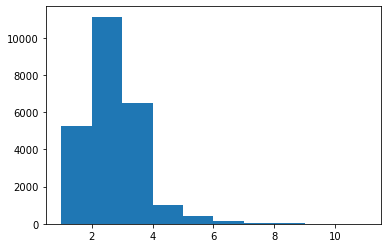

In [135]:
plt.hist(x='bathroomcnt', data=zillow_df)

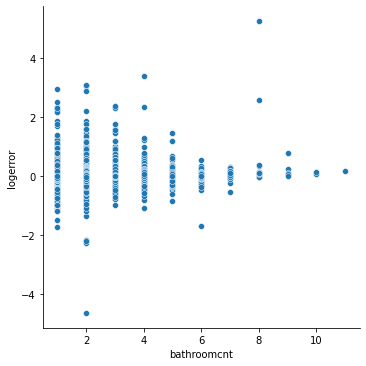

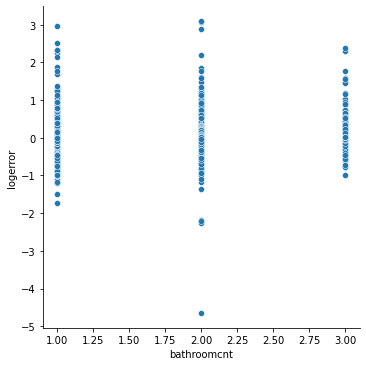

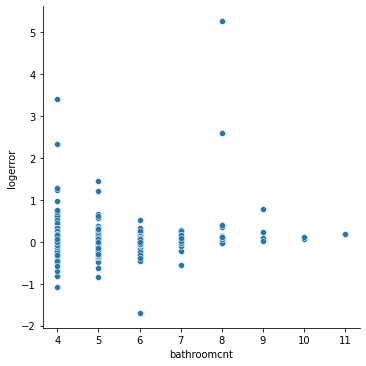

In [136]:
null_hyp = "Properties with 1-3.5 bathrooms do not have a logerror lower than the population"
alt_hyp = "Properties with 1-3.5 bathrooms have a lower logerror than the population"

bath_1_3 = zillow_df[(zillow_df.bathroomcnt >= 1) & (zillow_df.bathroomcnt < 4)]
bath_over_4 = zillow_df[(zillow_df.bathroomcnt >= 4)]

sns.relplot(x='bathroomcnt', y='logerror', data=zillow_df)
plt.show()
sns.relplot(x='bathroomcnt', y='logerror', data=bath_1_3)
plt.show()
sns.relplot(x='bathroomcnt', y='logerror', data=bath_over_4)
plt.show()

In [137]:
t, p = stats.ttest_1samp(bath_1_3.logerror, zillow_df.logerror.mean())
utils.evaluate_hypothesis_ttest(p, t, alpha, "less", null_hyp, alt_hyp)

stats.mannwhitneyu(bath_1_3.logerror, zillow_df.logerror, alternative="less")

------------------------------------------
t:  -1.4281045330638131, p:  0.15327541811245896, a:  0.05

We fail to reject the null hypothesis:  Properties with 1-3.5 bathrooms do not have a logerror lower than the population
------------------------------------------


MannwhitneyuResult(statistic=278106431.0, pvalue=0.0496038787587524)

Fail to reject null hypothesis with ttest, but significant (barely) with Mann-Whitney test.  Probably not a good candidate as a feature.

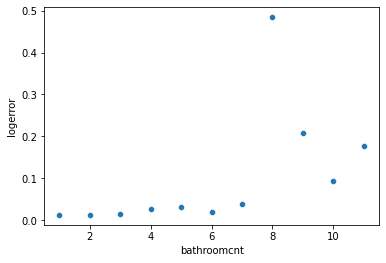

------------------------------------------
corr:  0.035954271279030336, p:  1.7905923957627763e-08, a:  0.05

We reject the null hypothesis. We move forward with the alternative hypothesis:  There is a correlation between bathrooms and logerror
Correlation direction:  positive
------------------------------------------


{'corr': 0.035954271279030336,
 'p': 1.7905923957627763e-08,
 'a': 0.05,
 'reject_null': True,
 'message': 'We reject the null hypothesis. We move forward with the alternative hypothesis:  There is a correlation between bathrooms and logerror',
 'correlation': 'positive'}

In [138]:
null_hyp = "There is no correlation between bathrooms and logerror"
alt_hyp = "There is a correlation between bathrooms and logerror"

sns.scatterplot(x=zillow_df.groupby('bathroomcnt').logerror.mean().index, y=zillow_df.groupby('bathroomcnt').logerror.mean())
plt.show()

r, p = stats.pearsonr(zillow_df.bathroomcnt, zillow_df.logerror)
utils.evaluate_hypothesis_pcorrelation(r, p, alpha, null_hyp, alt_hyp)

Once again, a statistically significant positive correlation, but not a practical one.

4. Is logerror significantly lower for homes 50 yrs old and less than homes over 50 years old?
    * Does logerror correlate with age?

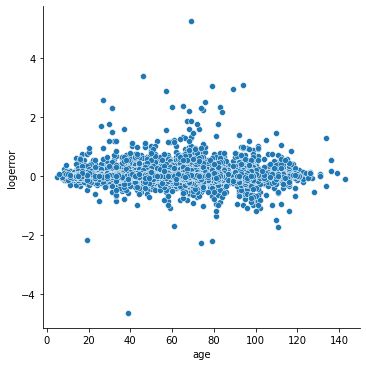

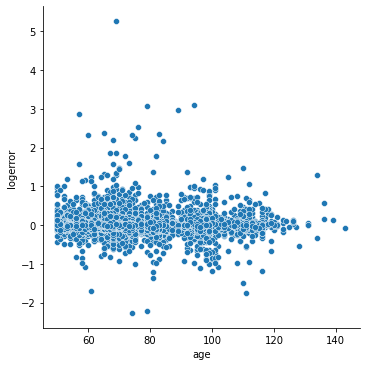

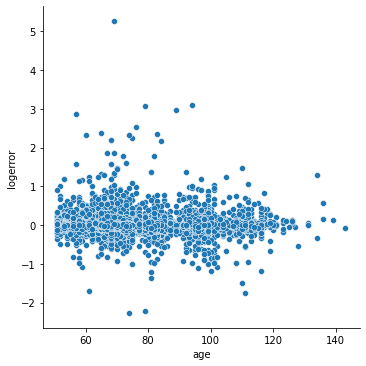

In [142]:
null_hyp = "Logerror for homes 50 years old and less is not lower than homes over 50 years old"
alt_hyp = "Logerror for homes 50 years old and less is lower than homes over 50 years old"

zillow_df['age'] = date.today().year - zillow_df.yearbuilt
yrs_less_50 = zillow_df[(zillow_df.age >= 50)]
yrs_over_50 = zillow_df[(zillow_df.age > 50)]

sns.relplot(x='age', y='logerror', data=zillow_df)
plt.show()
sns.relplot(x='age', y='logerror', data=yrs_less_50)
plt.show()
sns.relplot(x='age', y='logerror', data=yrs_over_50)
plt.show()

In [146]:
t, p = stats.ttest_ind(yrs_less_50.logerror, yrs_over_50.logerror)
utils.evaluate_hypothesis_ttest(p, t, alpha, "less", null_hyp, alt_hyp)

stats.mannwhitneyu(yrs_less_50.logerror, yrs_over_50.logerror, alternative="less")

------------------------------------------
t:  0.15686887903592556, p:  0.8753492485834302, a:  0.05

We fail to reject the null hypothesis:  Logerror for homes 50 years old and less is not lower than homes over 50 years old
------------------------------------------


MannwhitneyuResult(statistic=111423019.5, pvalue=0.5847983060698507)

The logerror is not statistically lower for properties 50 yrs and less than properties over 50 by both the two sample T-test and Mann-Whitney test. Not a good candidate as a feature.

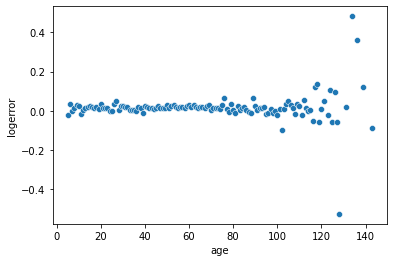

------------------------------------------
corr:  -0.012251857469878523, p:  0.05507053648470991, a:  0.05

We fail to reject the null hypothesis:  There is no correlation between age and logerror
Correlation direction:  negative
------------------------------------------


{'corr': -0.012251857469878523,
 'p': 0.05507053648470991,
 'a': 0.05,
 'reject_null': False,
 'message': 'We fail to reject the null hypothesis:  There is no correlation between age and logerror',
 'correlation': 'negative'}

In [147]:
null_hyp = "There is no correlation between age and logerror"
alt_hyp = "There is a correlation between age and logerror"

sns.scatterplot(x=zillow_df.groupby('age').logerror.mean().index, y=zillow_df.groupby('age').logerror.mean())
plt.show()

r, p = stats.pearsonr(zillow_df.age, zillow_df.logerror)
utils.evaluate_hypothesis_pcorrelation(r, p, alpha, null_hyp, alt_hyp)

No correlation between age and logerror.